# Exploring the Data for classification

In this notebook, we will look at another dataset from [Kaggle](https://www.kaggle.com/competitions/titanic/overview). The dataset is called the Titanic dataset and our goal is to predict whether a passenger survived or not. Instead of predicting a continuous value, we are now going to predict a binary value: survived or not. While this is also a supervised learning problem, it is not a regression problem but a classification problem; we are trying to predict a limited number of classes. Before we start building models, first, we will explore the data to understand the features and the target variable. We start off by loading the data:

In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd

titanic_df = pd.read_csv(os.path.join(data_directory,'titanic/train.csv'))
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

As we can see, the dataset has 12 columns. The columns are as follows:

| Column Name | Description | Values |
|-------------|-------------|--------|
| PassengerId | A unique identifier for the passenger | 
| Survived | Whether the passenger survived or not | 0 = No, 1 = Yes | 
| Pclass | The class of the ticket the passenger bought | 1 = 1st class, 2 = 2nd class, 3 = 3rd class | 
| Name | The name of the passenger | 
| Sex  | The gender of the passenger | male, female | 
| Age  | The age of the passenger in years | 
| SibSp | The number of siblings or spouses the passenger had on board |
| Parch | The number of parents or children the passenger had on board |
| Ticket | The ticket number | 
| Fare | The fare the passenger paid | 
| Cabin | The cabin number | 
| Embarked | The port the passenger embarked from | (C = Cherbourg, Q = Queenstown, S = Southampton) | 

Using this information, we can start exploring the data. Let's start by looking at the number of rows in the dataset:

In [3]:
len(titanic_df)

891

There are 891 rows in the dataset, this means that there are 891 passengers in the dataset.

## Missing Values

Let's first look if there are any missing values in the dataset. Let's look at the number of missing values in each column:

In [4]:
titanic_df.isnull().sum().to_frame()

0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2

We can see that the `Age`, `Cabin`, and `Embarked` columns have missing values. We will have to handle these missing values later. Next, let's look at a summary of the dataset. To do this, we will use the `describe` method of the DataFrame. This method gives us a summary of the numerical columns in the dataset:

In [5]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

The table above shows the summary statistics per column of the dataset. We can see that the `Age` column has missing values, the row count is `714` and we should have `891`. We will need to handle these missing values before we can build a model. We will do this later. We can also see the mean values of each column. We see that the `Survived` column has a mean of `0.383838`. This means that only `38.4%` of the passengers survived. This is important to know as it will help us understand the distribution of the target variable. We can confirm this count by calculating the percentage ourselves:

In [6]:
percentage_survived = titanic_df['Survived'].mean() * 100
percentage_survived

38.38383838383838

Only 38% of the passengers survived. This is important to know because if we were to predict that all passengers did not survive, we would be correct 62% of the time. This is called the baseline accuracy. We will use this as a reference point to evaluate our models. If our model is not better than the baseline accuracy, then it is not a good model. 

## Distribution of the categorical features


In the table above, we saw that four variables (including the target variable) are categorical: `Survived`, `Pclass`, `Sex`, and `Embarked`. Let's look at the distribution of these variables. 
We will start by looking at the distribution of the `Pclass` column:

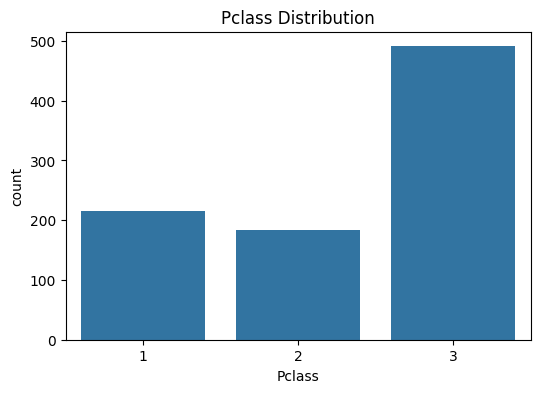

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

sns.countplot(x='Pclass', data=titanic_df)

plt.title('Pclass Distribution')

plt.show()

We can see that the majority of the passengers were in the 3rd class, followed by the 1st class and then the 2nd class. Next, let's look at the distribution of the `Sex` column:

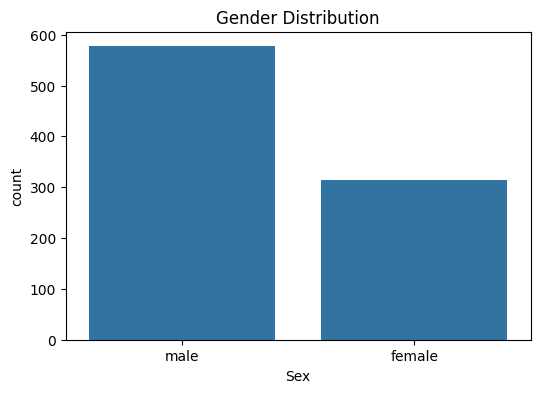

In [8]:
plt.figure(figsize=(6, 4))

sns.countplot(x='Sex', data=titanic_df)

plt.title('Gender Distribution')

plt.show()

We can see that there were more male passengers than female passengers. This is something we will need to keep in mind when building the model. 
Next, let's look at the distribution of the `Embarked` column:

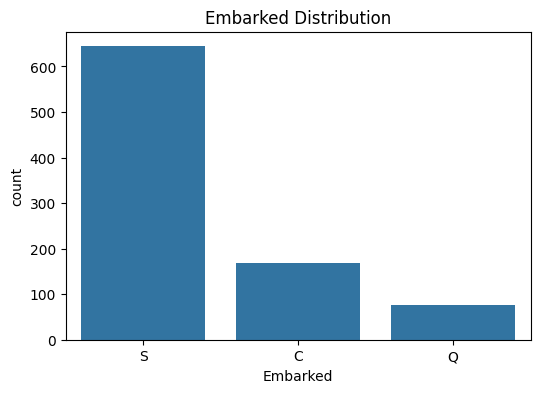

In [9]:
plt.figure(figsize=(6, 4))

sns.countplot(x='Embarked', data=titanic_df)

plt.title('Embarked Distribution')

plt.show()

Most of the passengers embarked from Southampton, followed by Cherbourg and then Queenstown. Next, we will look at the distribution of the target variable, `Survived`:

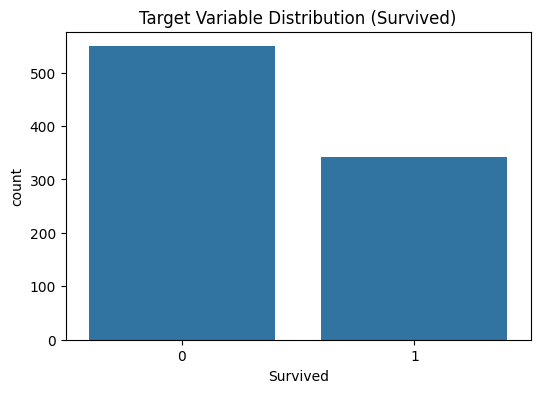

In [10]:
plt.figure(figsize=(6, 4))

sns.countplot(x='Survived', data=titanic_df)

plt.title('Target Variable Distribution (Survived)')

plt.show()

We can see that the majority of the passengers did not survive. This is important to know because the model might be biased towards predicting that passengers did not survive. 
We will need to keep this in mind when building the model.

## Distributions of the numerical features

There are two numerical columns in the dataset: `Age` and `Fare`. Let's look at the distribution of these columns. We will start by looking at the distribution of the `Age` column:

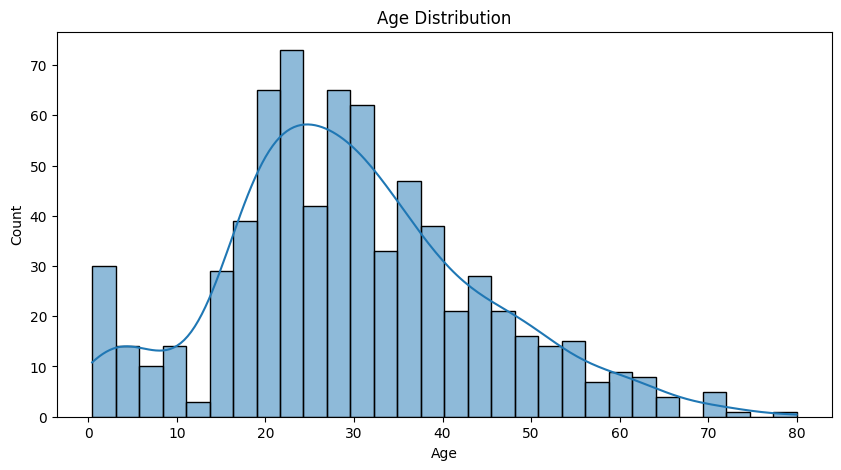

In [11]:


plt.figure(figsize=(10, 5))

sns.histplot(titanic_df['Age'], bins=30, kde=True)

plt.title('Age Distribution')

plt.show()

We can see that the majority of the passengers were between 20 and 30 years old. Next, let's look at the distribution of the `Fare` column:

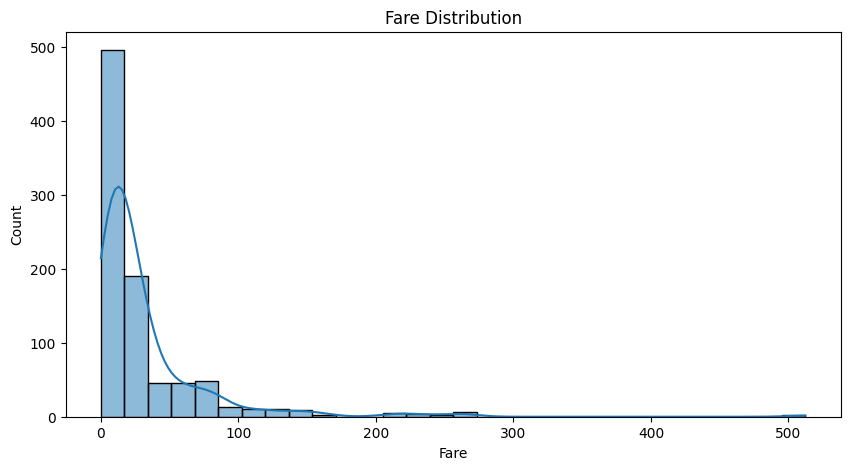

In [12]:
plt.figure(figsize=(10, 5))

sns.histplot(titanic_df['Fare'], bins=30, kde=True)

plt.title('Fare Distribution')

plt.show()



## Distributions of the target variable in relation to the categorical features

Next, we will look at the distribution of the target variable with respect to the other features. First, we will look at the distribution of the target variable with respect to the `Sex` feature.

In [13]:
titanic_df.groupby('Sex')['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

We can see the percentage of women who survived is much higher than the percentage of men who survived. This is also an important feature to consider when building our model. Next, we will look at the distribution of the target variable with respect to the `Pclass` feature.

In [14]:
titanic_df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

These results show that people in a higher class, were more likely to survive. This is also an important feature to consider when building our model. Next, we will look at the distribution of the target variable with respect to the `Embarked` feature.

In [15]:
titanic_df.groupby('Embarked')['Survived'].mean() * 100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

The place where people embarked from also seems to have an effect on the survival rate. This is also an important feature to consider when building our model. Next, we will look at the distribution of the target variable with respect to the `SibSp` feature.

## Pearson's Correlation Matrix for correlation between numerical features and the target variable

In the previous section, we looked at the distribution of the target variable with respect to the other features. we saw already that the `Sex`, `Pclass`, and `Embarked` features have an effect on the survival rate. To further understand the relationship between the features and the target variable, we will look at the correlation between the numerical features and the target variable. First, we will look at the Pearson's correlation matrix for the numerical features. In the next section, we will look at the $\chi^2$ test for the categorical features.
 
The Pearson's correlation matrix quantifies the linear relationship between the numerical features. The correlation coefficient ranges from -1 to 1:

- 1: perfect positive linear relationship (as the feature increases, the target variable also increases proportionally)
- -1: perfect negative linear relationship (as the feature increases, the target variable decreases proportionally)
- 0: no linear relationship

This matrix helps identify which features are strongly or weakly correlated with the target variable. We can use this information to select the most important features for our model.
Let's start by looking at the correlation between the `Age`, `Fare` and `Survived` columns:

Text(0.5, 1.0, 'Pearson Correlation Matrix')

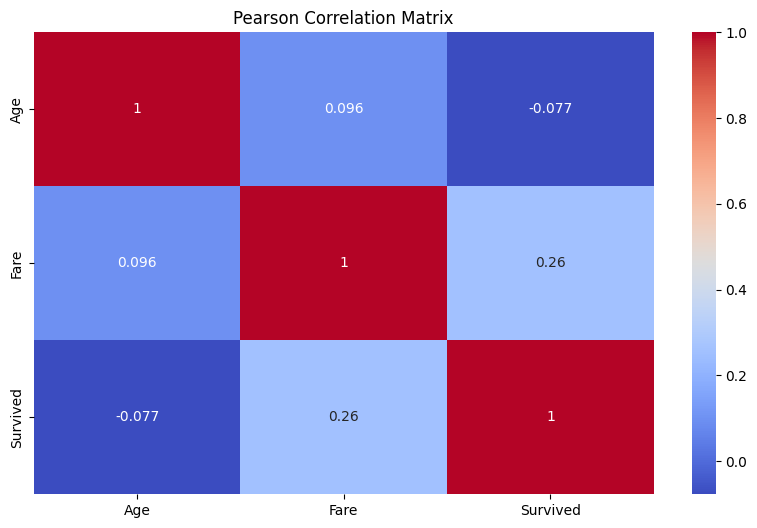

In [21]:
# Plot pearson correlation matrix
numerical_columns = ['Age',  'Fare', 'Survived']


plt.figure(figsize=(10, 6))

sns.heatmap(titanic_df[numerical_columns].corr(), annot=True, cmap='coolwarm')

plt.title('Pearson Correlation Matrix')

From the Pearson's correlation matrix above, we can see that the `Fare` column has the higher correlation with the `Survived` column than the `Age` column. This could mean that the `Fare` column is a better predictor of survival than the `Age` column. We will keep this in mind when building the model. 

Note that also the `Fare` column only has a weak correlation with the `Age` column. This means that the two columns are not strongly correlated. This is important to know because if two columns are strongly correlated, we only need to keep one of them in the model.

## Chi-squared test for correlation between categorical variables and target variable

The $\chi^2$ test is used to determine whether there is a significant association between two categorical variables. The test is based on the difference between the expected and observed frequencies of a feature variable with the target variable. The $\chi^2$ test is used to test the null hypothesis that the two variables are independent. If the p-value is less than a certain threshold (usually 0.05), we reject the null hypothesis and conclude that the two variables are dependent. To perform the $\chi^2$ test, we will first need to encode the categorical variables as numerical variables. To do this, we will use the `get_dummies` function of the pandas library. This function creates a new column for each unique value in the categorical column. The new columns are binary columns, where 1 indicates the presence of the value and 0 indicates the absence of the value. Let's start by encoding the categorical columns:

In [17]:
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
titanic_dummies_df = pd.get_dummies(titanic_df, columns=categorical_columns)
titanic_dummies_df.head()


PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age            Ticket     Fare Cabin  Pclass_1  Pclass_2  Pclass_3  ...  \
0  22.0         A/5 21171   7.2500   NaN     False     False      True  ...   
1  38.0          PC 17599  71.2833   C85      True     False     False  ...   
2  26.0  STON/O2. 3101282   7.9250   NaN     False     False      True  ...   
3  35.0            113803  53.1000  C123      True     False     False  ...   
4  35.0            373450   8.0500   NaN     False     False      True  ...   

   SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  Parch_3  Parch_4  \
0    False    False    False     True    False    False    False    False   
1    False    False    False     True    False    False    False    False   
2    False    False    False     True    False    False    False    False   
3    False    False    False     True    False    False    False    False   
4    False    False    False     True    False    False    False    False   

   Parch_5  Parch_6  
0    False    False  
1    False    False  
2    False    False  
3    False    False  
4    False    False  

[5 rows x 29 columns]

After encoding, we need to select the encoded columns. Each of the encoded columns starts with the name of the original column followed by an underscore and the value. For example, the `Sex_female` column is the encoded column for the `Sex` column with the value `female`. The code below selects all the encoded columns by checking which of the columns start with the name of the original columns:

In [18]:
# Chi-square test
encoded_columns = [column 
                   for column in titanic_dummies_df.columns
                   for category in categorical_columns
                   if column.startswith(category)]
encoded_columns

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'SibSp_0',
 'SibSp_1',
 'SibSp_2',
 'SibSp_3',
 'SibSp_4',
 'SibSp_5',
 'SibSp_8',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Parch_3',
 'Parch_4',
 'Parch_5',
 'Parch_6']

After we have selected the encoded columns, we can perform the $\chi^2$ test. We will use the `chi2` function of the `sklearn.feature_selection` module. This function returns the $\chi^2$ statistic and the p-value. 

In [19]:
from sklearn.feature_selection import chi2

chi2_values, p_values = chi2(titanic_dummies_df[encoded_columns], titanic_df['Survived'])
chi2_values, p_values

(array([5.51751510e+01, 6.16076687e+00, 4.15530709e+01, 1.70348127e+02,
        9.27024470e+01, 2.04644013e+01, 1.08467891e-02, 5.98483982e+00,
        3.79935346e+00, 2.04294991e+01, 7.66193147e-01, 1.21182053e+00,
        3.58951682e+00, 3.11475410e+00, 4.36065574e+00, 4.62827086e+00,
        1.39161500e+01, 4.56427955e+00, 9.87834340e-01, 2.49180328e+00,
        7.14495255e-01, 6.22950820e-01]),
 array([1.10253810e-13, 1.30614569e-02, 1.14714147e-10, 6.21058490e-39,
        6.07783826e-22, 6.07507131e-06, 9.17051963e-01, 1.44293530e-02,
        5.12723773e-02, 6.18687479e-06, 3.81397315e-01, 2.70971869e-01,
        5.81451466e-02, 7.75861891e-02, 3.67781458e-02, 3.14492437e-02,
        1.91148980e-04, 3.26454024e-02, 3.20272257e-01, 1.14440534e-01,
        3.97955523e-01, 4.29952852e-01]))

To check on which variable the target variable depends the most, we will sort the p-values in ascending order. The smaller the p-value, the more likely the target variable depends on the feature variable. For variables with a p-value less than 0.05, we can reject the null hypothesis and conclude that the two variables are dependent. Let's look at the p-values of the $\chi^2$ test:

In [35]:
# Plot chi2 values

plt.figure(figsize=(10, 6))

chi2_values_df = pd.DataFrame({"chi2": chi2_values, "p_value": p_values}, index=encoded_columns)

sorted_chi2_values = chi2_values_df.sort_values(by="p_value", ascending=True)
sorted_chi2_values['significant'] = sorted_chi2_values["p_value"] < 0.05
sorted_chi2_values


chi2       p_value  significant
Sex_female  170.348127  6.210585e-39         True
Sex_male     92.702447  6.077838e-22         True
Pclass_1     55.175151  1.102538e-13         True
Pclass_3     41.553071  1.147141e-10         True
Embarked_C   20.464401  6.075071e-06         True
SibSp_1      20.429499  6.186875e-06         True
Parch_1      13.916150  1.911490e-04         True
Pclass_2      6.160767  1.306146e-02         True
Embarked_S    5.984840  1.442935e-02         True
Parch_0       4.628271  3.144924e-02         True
Parch_2       4.564280  3.264540e-02         True
SibSp_8       4.360656  3.677815e-02         True
SibSp_0       3.799353  5.127238e-02        False
SibSp_4       3.589517  5.814515e-02        False
SibSp_5       3.114754  7.758619e-02        False
Parch_4       2.491803  1.144405e-01        False
SibSp_3       1.211821  2.709719e-01        False
Parch_3       0.987834  3.202723e-01        False
SibSp_2       0.766193  3.813973e-01        False
Parch_5       0.714495  3.979555e-01        False
Parch_6       0.622951  4.299529e-01        False
Embarked_Q    0.010847  9.170520e-01        False

<Figure size 1000x600 with 0 Axes>

We can also plot the p-values to visualize the results:

<Axes: >

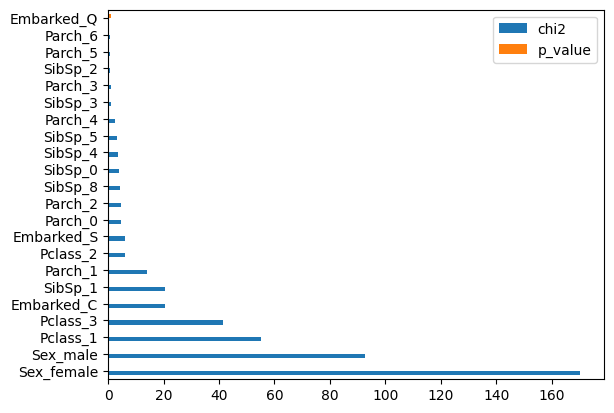

In [41]:
sorted_chi2_values[["chi2", "p_value"]].plot.barh()

From the table and figure above, we can see that the target variable is dependent on the following variables: `Sex_female`, `Sex_male`, `Pclass_1`, `Pclass2`, `Pclass3`, `Embarked_C`,  `Embarked_S`, `SibSp1`, `SibSp8`, `Parch_0`, `Parch_1`, and `Parch_2`. This means that these variables are important for predicting the target variable. We will keep this in mind when building the model.

# Conclusion

In this notebook, we explored the Titanic dataset. We looked at:

- the distribution of the features separately, 
- at the distributions between the features and the target variable. 
- at the Pearson's correlation between the features and the target variable. 
- at the $\chi^2$ test for the categorical features.
 
From these analyses we found that:
- the `Sex`, `Pclass`, `Embarked`, `SibSp`, and `Parch` features may have an effect on the survival rate. 
- that the `Fare` column has a higher correlation with the `Survived` column than the `Age` column. This means that the `Fare` column could be a better predictor of survival than the `Age` column. 

 By doing a preliminary exploration of the data, we can already get a good idea of the data and which variables will be important in building a good model. When building the model, we will need to keep these findings in mind. We will also need to handle the missing values in the dataset before we can build the model. We will do this in the next notebook.